In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, Select
from IPython.display import display
from IPython.display import Image

<h1>Book recommendation Network</h1>

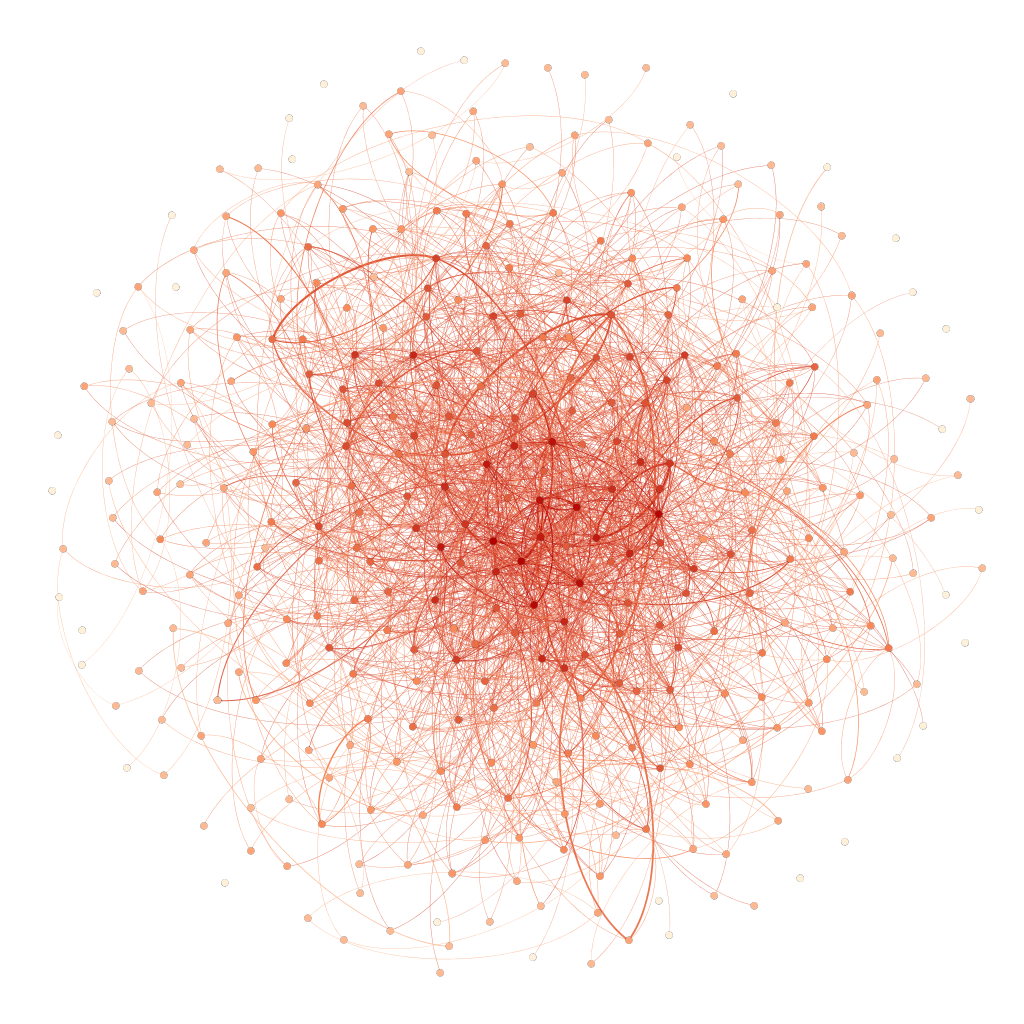https://github.com/timesend/Manning-Networks/blob/master/pictures/Simple%20network%20image%202.png?raw=true)

In [2]:
df= pd.read_csv('datasets\dataset.csv')
df=df.sort_values(by=['user_id','date_created'])
df["chapter"] = df["chapter"].astype(str)
df["book_chapter"] = df["book"].astype(str) +df["chapter"].astype(str)
df["source"] =df["book_chapter"]
df["target"]= df["source"].shift(-1)  
df["user_check"]= df["user_id"].shift(-1)
df['keep_drop'] = np.where((df['user_id'] == df['user_id'].shift(-1))
                     , df['user_id'], np.nan)
df=df.dropna(subset=["keep_drop"])
G=nx.from_pandas_edgelist(df,"source",'target', create_using=nx.DiGraph)
out=nx.out_degree_centrality(G)
nx.set_node_attributes(G, out, 'out-degree')
bb = nx.betweenness_centrality(G)
nx.set_node_attributes(G, bb, 'betweenness')
close= nx.closeness_centrality(G)
nx.set_node_attributes(G, close, 'close')
eigen= nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigen, 'eigen')
data_list=list(G.nodes(data=True))
data={}
data['book_chapter']=[x[0] for x in data_list]
data['out-degree'] = [x[1]['out-degree'] for x in data_list]
data['eigen'] = [x[1]['eigen'] for x in data_list]
data['betweenness'] = [x[1]['betweenness'] for x in data_list]
df1 = pd.DataFrame(data)


In [3]:
book_chapter=sorted(df.book_chapter.unique().tolist())
def view(book_chapter=''):
    row1=[n for n in G[book_chapter]]
    df2= pd.DataFrame(row1)
    df3=df2.set_index(0).join(df1.set_index('book_chapter'))
    df3=df3.sort_values(by=['eigen'],ascending=False)
    df3=df3.rename_axis('book_chapter')
    return df3

w = Select(options=book_chapter)
v = interact(view, book_chapter=w)
display(v)

interactive(children=(Select(description='book_chapter', options=('abernethy2chapter-10', 'abernethy2chapter-6…

<function __main__.view(book_chapter='')>